In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import xarray as xr
import matplotlib.colors as mcolors
import cmocean as cmo 

dst = xr.open_dataset("population_dataset_time_INIT1.nc")

N = len(dst.kappa)
NT = len(dst.t)


hr2s = 1/3600
wm = 0.5 * hr2s
wd = 0.05 * hr2s
n2 = 1e-4
Ld = 0.006 * hr2s
Lm  = 0.004 * hr2s
growth_m = 0.05 * hr2s
growth_d = 0.008 * hr2s
colors = [ "#F2B707",  "#9F22F2", "#BF0F0F"]


In [6]:
def jacobian(kappa, h1, h2, m1, m2, d1, d2, n1):
    j = np.array([[(-kappa/h1 + growth_m*n1 - Lm),  (kappa/h1 + wm/h1),     0,      0,    growth_m*m1],
                    [kappa/h2,  (-wm/h2 - kappa/h2 - Lm),   0,     0,        0],
                    [0, 0,  (-wd/h1 - kappa/h1 + growth_d*n1 - Ld),     kappa/h1,   growth_d*d1],
                    [0,   0,  (wd/h2 + kappa/h2),     (-kappa/h2 - Ld),   0],
                    [-growth_m*n1,     0,  -growth_d*n1,    0,  (-kappa/h1 - growth_d*d1 - growth_m*m1)]])
    eigenvalues, eigenvectors = np.linalg.eig(j)
    # eigenvalues = np.linalg.eigvals(j)

    # Sort by eigenvalue 
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return (eigenvalues, eigenvectors)      

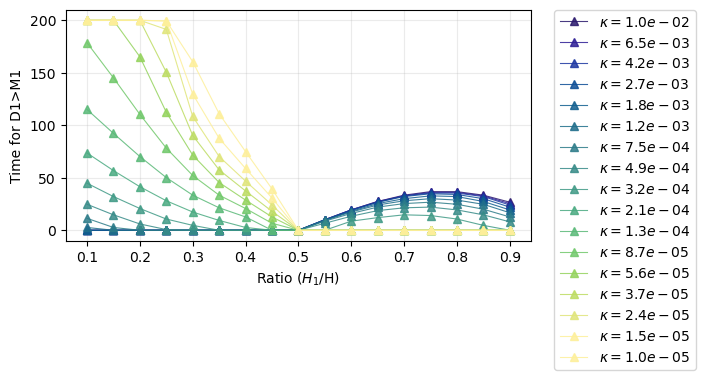

In [ ]:
id = 5
ir = 8
ik = 4       


fig = plt.figure(figsize=(6,3))
ax = plt.gca()


for ik in range(0,17):

    zc_time = [] 
    for ir in range(0,17):
        d1 = dst.d1.values[:, id ,ir, ik]
        d2 = dst.d2.values[:, id ,ir, ik] # (time, depth, ratio, kappa) 
        m1 = dst.m1.values[:, id ,ir, ik]
        m2 = dst.m2.values[:, id ,ir, ik]
        n1 = dst.n1.values[:, id ,ir, ik]


        ind = m1 > d1 
        ind = sum(ind)
        time = dst.t.values[ind]/3600 
        zc_time.append(time)
    ax.plot(dst.ratio.values, zc_time, '^-',color=cmo.cm.haline(ik/15),  linewidth=0.8, alpha=0.85, label=r"$\kappa=%2.1e$" % dst.kappa.values[ik])

ax.set_xlabel("Ratio ($H_1$/H)")
ax.set_ylabel("Time for D1>M1")
ax.grid(alpha=0.25)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.set_ylim(0,8)
# ax.set_yscale("log")
# fig.savefig("diatoms=2xMCinit.png")

(0.0, 100.0)

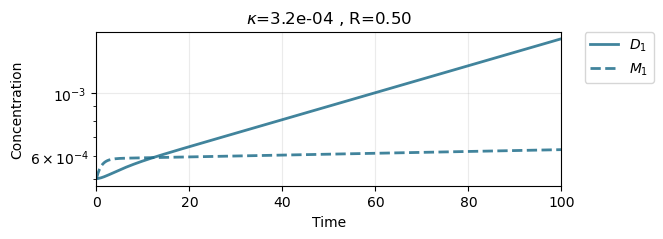

In [ ]:

fig = plt.figure(figsize=(6,2))
ax = plt.gca()

id = 5
ir = 8
ik = 4       


time =  dst.t.values/3600

d1 = dst.d1.values[:, id ,ir, ik]
d2 = dst.d2.values[:, id ,ir, ik] # (time, depth, ratio, kappa) 
m1 = dst.m1.values[:, id ,ir, ik]
m2 = dst.m2.values[:, id ,ir, ik]
n1 = dst.n1.values[:, id ,ir, ik]
title = r"$\kappa$=%2.1e , R=%2.2f" % (dst.kappa.values[ik], dst.ratio.values[ir])
ax.set_title(title)
            
ax.plot(time, d1, '-',color=cmo.cm.haline(5/15),  linewidth=2, alpha=0.85, label=r"$D_1$")
ax.plot(time, m1, '--',color=cmo.cm.haline(5/15),  linewidth=2, alpha=0.85, label=r"$M_1$")
ax.set_xlabel("Time")
ax.set_ylabel("Concentration")
ax.grid(alpha=0.25)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_yscale('log')
ax.set_xlim(0,100)



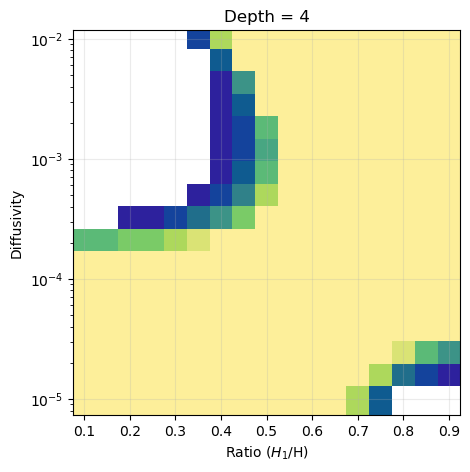

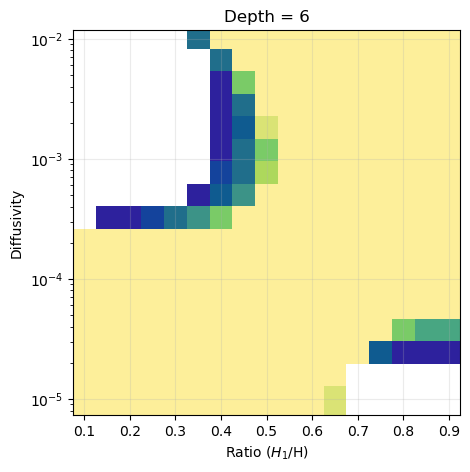

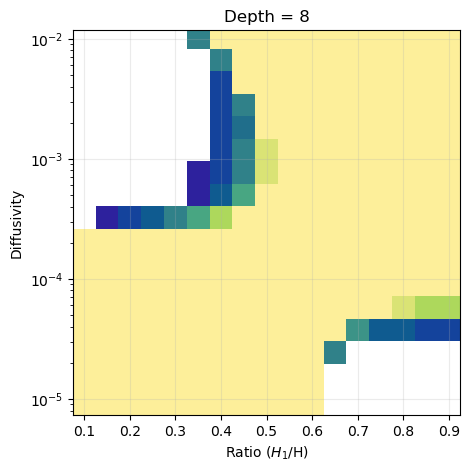

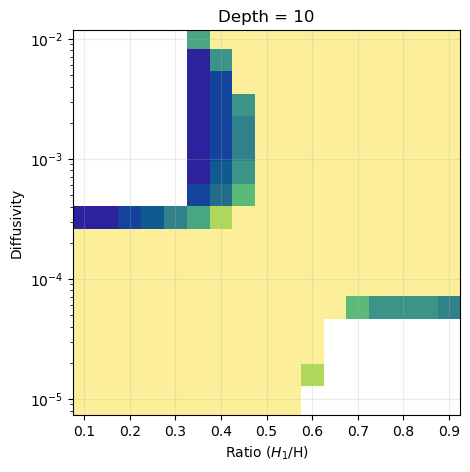

In [ ]:
id = 7

for id in range(0,17, 5):

    fig = plt.figure(figsize=(5,5))
    ax = plt.gca()
    output = np.zeros((17,17))

    for ik in range(0,17):

        for ir in range(0,17):
            d1 = dst.d1.values[:, id ,ir, ik]
            d2 = dst.d2.values[:, id ,ir, ik] # (time, depth, ratio, kappa) 
            m1 = dst.m1.values[:, id ,ir, ik]
            m2 = dst.m2.values[:, id ,ir, ik]
            n1 = dst.n1.values[:, id ,ir, ik]


            ind = m1 > d1 
            ind = sum(ind)
            time = dst.t.values[ind]/3600 
            output[ir, ik] = time
    output[output==0] = np.nan
    h= ax.pcolormesh(dst.ratio.values, dst.kappa.values, output, cmap=cmo.cm.haline, vmin=0, vmax=8) #'^-',color=cmo.cm.haline(ik/15),  linewidth=0.8, alpha=0.85, label=r"$\kappa=%2.1e$" % dst.kappa.values[ik])
    ax.set_yscale('log')
    plt.colorbar(h) 
    ax.set_xlabel("Ratio ($H_1$/H)")
    ax.set_ylabel("Diffusivity")
    ax.grid(alpha=0.25)
    ax.set_title("Depth = %d" % dst.depth.values[id])


<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_1582867/2946769307.py:31: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("Re($\lambda$)")


Depth = 6.19 m, R = 0.5


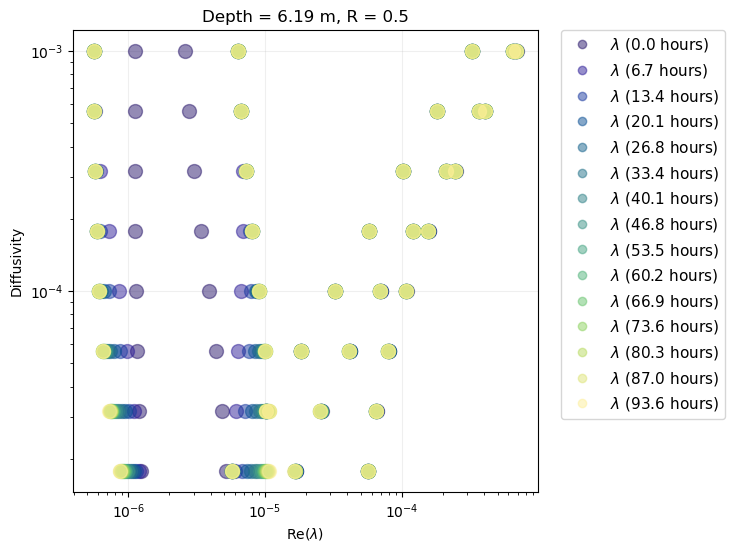

In [ ]:
# Snapshot of three time frames 
TIMES = list(range(0, 300, 20)) 

id = 5
ir = 8

# Depth = 5.00 m, R = 0.6, Kappa = 2e-04 (interesting)
depth = dst.depth.values[id]
ratio = dst.ratio.values[ir]
h1 = ratio * depth
h2 = depth - h1

# txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)
txt = "Depth = %2.2f m, R = %2.1f" % (depth, ratio)
print(txt)

fig = plt.figure(figsize=(6,6))
ax = plt.gca()


shapes = ['o', 's', '^', 'x', 'v']
shapes = ['o', 'o', 'o', 'o', 'o']

variables = ["M_1", "M_2", "D_1", "D_2", "N_1"]
ax.grid(alpha=0.2)
# ax.legend()
ax.set_title(txt)
ax.axhline(y=0, color='k', alpha=0.5)
ax.axvline(x=0, color='k', alpha=0.5)
ax.set_ylabel("Diffusivity")
ax.set_xlabel("Re($\lambda$)")

for ik in range(0, 15, 2):
    kappa = dst.kappa.values[ik]
        
    for it in TIMES: 
        hour = dst.t.values[it]/3600
        d1 = dst.d1.values[it, id ,ir, ik]
        d2 = dst.d2.values[it, id ,ir, ik] # (time, depth, ratio, kappa) 
        m1 = dst.m1.values[it, id ,ir, ik]
        m2 = dst.m2.values[it, id ,ir, ik]
        n1 = dst.n1.values[it, id ,ir, ik]
        eigenvalues, ev = jacobian(kappa, h1, h2, m1, m2, d1, d2, n1)
        for e, eig in enumerate(eigenvalues):
            if eig.real < 0:
                eigenvalues[e] = -eig
                ev[e] = -ev[e]
            
        eigenvalues = sorted(eigenvalues)
        vector0 = np.array([m1, m2, d1, d2, n1])
        color = cmo.cm.haline(it/max(TIMES))

        for ie, eigenvalue in enumerate(eigenvalues):
            # if eigenvalue.real<0:
            #     vector0 = -vector
            # else:
            #     vector0 = vector
            ev0 = ev[ie]/ np.linalg.norm(ev[ie])
            vector0 = vector0/ np.linalg.norm(vector0)
            if ((it%1) == 0):
                ax.plot(abs(eigenvalue.real), kappa, shapes[ie], color=color, alpha=0.5, markersize=10) #, label=r"$\lambda_%d$ (%2.1f hours)" % (ie, hour), )
                # ax2.plot(ev0.dot(vector0), kappa, shapes[ie],  color=color, alpha=0.5)#,  label=r"$V_%d$ (%2.1f hours)" % (ie, hour))
            else:
                ax.plot(abs(eigenvalue.real), kappa, shapes[ie],  color=color, alpha=0.5, markersize=10)
                # ax2.plot(ev0.dot(vector0), kappa, shapes[ie],  color=color, alpha=0.5)
                # print(ev[ie].dot(ev[ie+1])) 

for it in TIMES:
    hour = dst.t.values[it]/3600
    ax.plot([],[], 'o', alpha=0.5, color = cmo.cm.haline(it/max(TIMES)),  label=r"$\lambda$ (%2.1f hours)" % (hour)) 

ax.set_yscale('log')
ax.set_xscale('log')


ax.legend(bbox_to_anchor=(1.05, 1), ncols=1, loc='upper left', borderaxespad=0., fontsize=11)
fn = txt.replace(",", "_")
# fig.savefig("eigens/%s.png" % fn, dpi=300)




<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_1809419/3071971378.py:24: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(hour, eigenvalue.real, 'o', label="$\lambda_%d$" % ie , color=cmo.cm.phase(ie/5))
/tmp/ipykernel_1809419/3071971378.py:24: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(hour, eigenvalue.real, 'o', label="$\lambda_%d$" % ie , color=cmo.cm.phase(ie/5))


ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

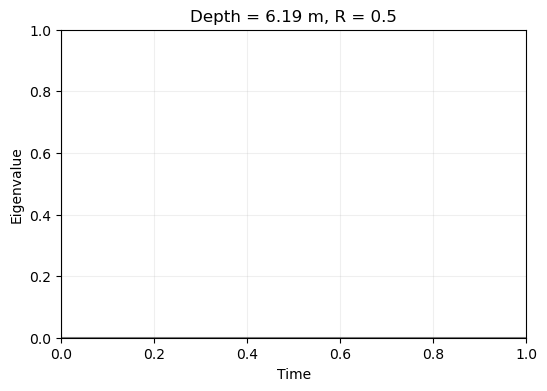

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca() 


variables = ["M_1", "M_2", "D_1", "D_2", "N_1"]

ax.grid(alpha=0.2)
ax.set_title(txt)
ax.axhline(y=0, color='k', alpha=0.5)
ax.axvline(x=0, color='k', alpha=0.5)
ax.set_ylabel("Eigenvalue")
ax.set_xlabel("Time")

for it in TIMES: 
    hour = dst.t.values[it]/3600
    d1 = dst.d1.values[it, id ,ir, ik]
    d2 = dst.d2.values[it, id ,ir, ik] # (time, depth, ratio, kappa) 
    m1 = dst.m1.values[it, id ,ir, ik]
    m2 = dst.m2.values[it, id ,ir, ik]
    n1 = dst.n1.values[it, id ,ir, ik]
    eigenvalues = jacobian(kappa, h1, h2, m1, m2, d1, d2, n1)
    for ie, eigenvalue in enumerate(eigenvalues):
        if it == 0:
            ax.plot(hour, eigenvalue.real, 'o', label="$\lambda_%d$" % ie , color=cmo.cm.phase(ie/5))
        else:
            ax.plot(hour, eigenvalue.real, 'o',  color=cmo.cm.phase(ie/5))

# ax.set_ylim(-0.00001,)
ax.legend(bbox_to_anchor=(1.05, 1), ncols=1, loc='upper left', borderaxespad=0., fontsize=14)
fn = txt.replace(",", "_")
ax.set_yscale('symlog')
# fig.savefig("eigens/%s.png" % fn, dpi=300)

In [ ]:
colors = [ "#F2B707",  "#9F22F2", "#BF0F0F"]
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharey=False, sharex=False)
hours = dst.t.values[:]/3600
axs[0].plot(hours, dst.d1.values[:, id ,ir, ik]/h1, label="D1", color=colors[0])
axs[0].plot(hours, dst.d2.values[:, id ,ir, ik]/h2, label="D2", color=colors[0], linestyle='--')
axs[0].plot(hours, dst.m1.values[:, id ,ir, ik]/h1, label="M1", color=colors[1])
axs[0].plot(hours, dst.m2.values[:, id ,ir, ik]/h2, label="M2", color=colors[1], linestyle='--')
axs[1].plot(hours, dst.n1.values[:, id ,ir, ik], label="N1", color=colors[2])
axs[0].set_ylabel("Phytoplankton")
axs[0].set_yscale("log")
axs[0].legend()
# d1 = dst.d1.values[it, id ,ir, ik]
# d2 = dst.d2.values[it, id ,ir, ik] # (time, depth, ratio, kappa) 
# m1 = dst.m1.values[it, id ,ir, ik]
# m2 = dst.m2.values[it, id ,ir, ik]
# n1 = dst.n1.values[it, id ,ir, ik]